In [40]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [41]:
microsoft = pd.read_csv('/content/MicrosoftStock.csv')
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [42]:
microsoft.shape


(1259, 8)

In [43]:
microsoft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [44]:
microsoft.describe()


,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


Exploratory Data Analysis

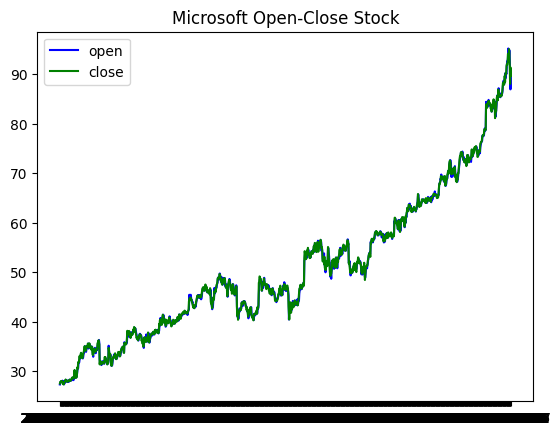

In [45]:
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()


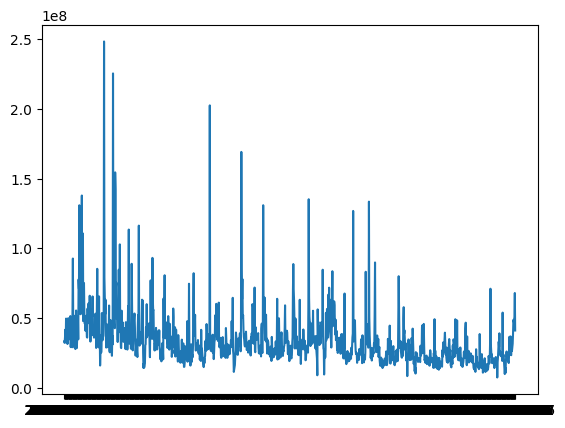

In [46]:
plt.plot(microsoft['date'],
		microsoft['volume'])
plt.show()


<ipython-input-47-940cf3590904>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(microsoft.corr(),


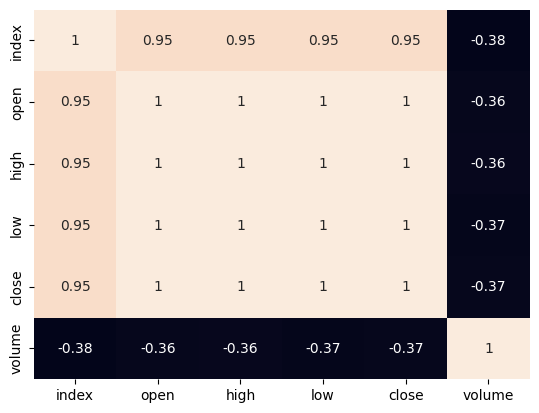

In [47]:
sns.heatmap(microsoft.corr(),
			annot=True,
			cbar=False)
plt.show()


Text(0.5, 1.0, 'Microsoft Stock Prices')

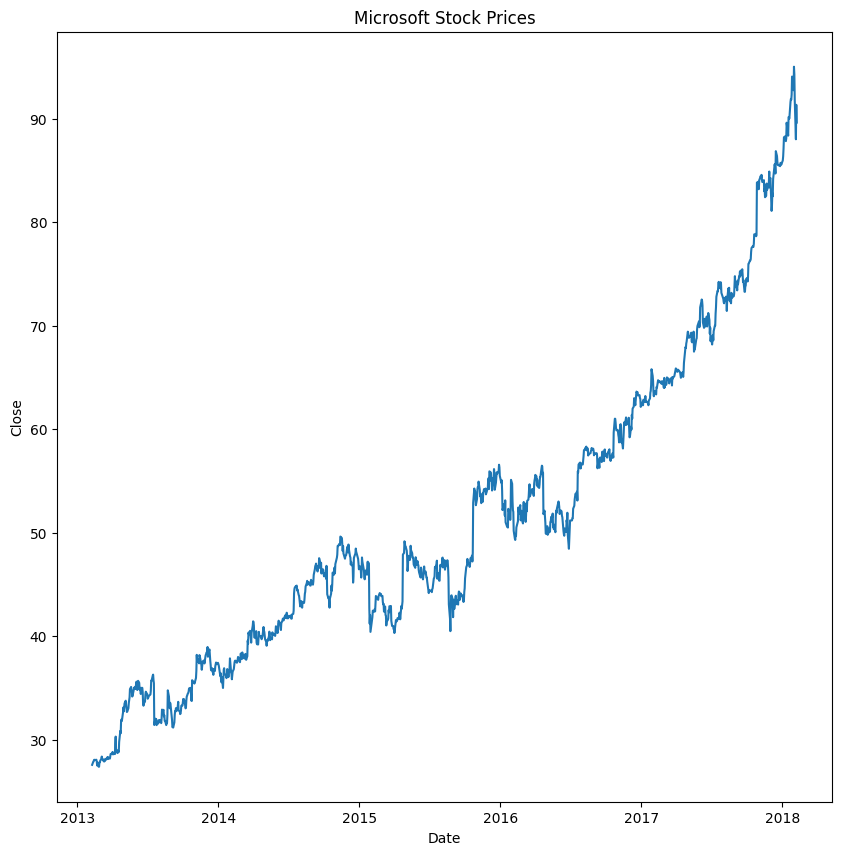

In [48]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
							> datetime(2013, 1, 1))
							& (microsoft['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [52]:
# prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Build the Model

use LSTM which is the RNN gated cell, LSTM reduces the problem of Vanishing gradients.

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Compile and Fit

While compiling a model we provide these three essential parameters:

optimizer – This is the method that helps to optimize the cost function by using gradient descent.

loss – The loss function by which we monitor whether the model is improving with training or not.

metrics – This helps to evaluate the model by predicting the training and the validation data.

In [54]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
			loss='mae',
			metrics=RootMeanSquaredError())

history = model.fit(X_train, y_train,
					epochs=20)


Epoch 1/20
38/38 [==============================] - 7s 50ms/step - loss: 0.2157 - root_mean_squared_error: 0.3318
Epoch 2/20
38/38 [==============================] - 2s 49ms/step - loss: 0.1125 - root_mean_squared_error: 0.1559
Epoch 3/20
38/38 [==============================] - 2s 50ms/step - loss: 0.1024 - root_mean_squared_error: 0.1391
Epoch 4/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0965 - root_mean_squared_error: 0.1350
Epoch 5/20
38/38 [==============================] - 4s 108ms/step - loss: 0.0983 - root_mean_squared_error: 0.1343
Epoch 6/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0948 - root_mean_squared_error: 0.1366
Epoch 7/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0932 - root_mean_squared_error: 0.1288
Epoch 8/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0923 - root_mean_squared_error: 0.1288
Epoch 9/20
38/38 [==============================] - 2s 52ms/step - loss: 0.0906 - root_

Model Evaluation

In [58]:
import numpy as np

# Assume these are your variables
ss = np.random.rand(100, 2)  # Example data for ss
training = 70  # Example value for training
dataset = np.random.rand(100, 1)  # Example data for dataset

testing = ss[training - 60:, :]
x_test = []
# Assuming the target values are the last column of dataset
y_test = dataset[training:, :]

for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
pred = model.predict(X_test)

1/1 [==============================] - 1s 770ms/step


<ipython-input-62-7f26d418dfba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = np.concatenate([np.nan*np.ones(len(test)-len(pred_reshaped)), pred_reshaped])


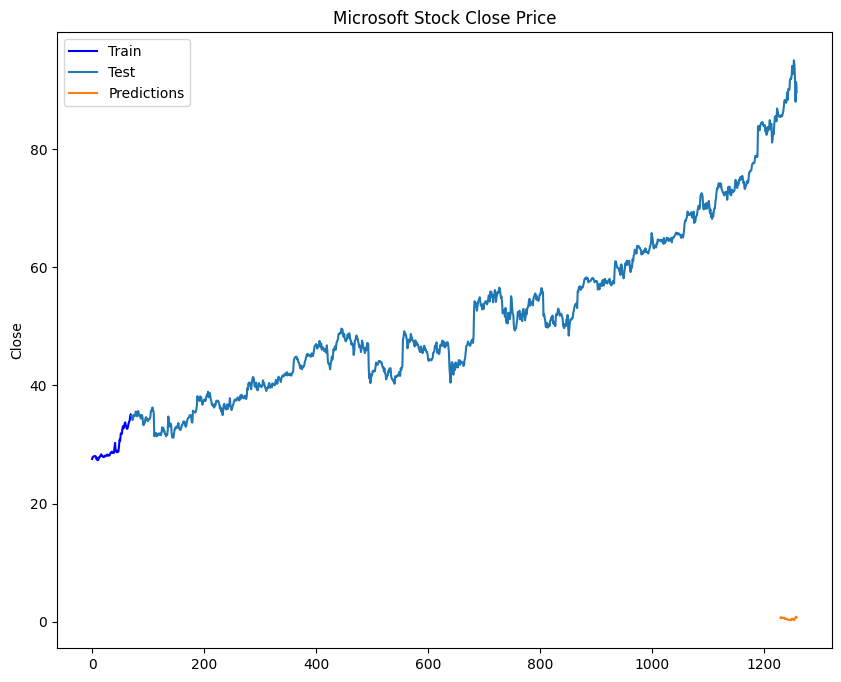

In [62]:
# Assuming pred is a 2D array of predictions, reshape it to 1D
pred_reshaped = pred.flatten()

# Concatenate the arrays
test['Predictions'] = np.concatenate([np.nan*np.ones(len(test)-len(pred_reshaped)), pred_reshaped])

# Now you can plot your data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()


In [63]:
# prompt: HOW TO FIT THE MODEL

model.fit(X_train, y_train, epochs=20)


Epoch 1/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0777 - root_mean_squared_error: 0.1113
Epoch 2/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0785 - root_mean_squared_error: 0.1111
Epoch 3/20
38/38 [==============================] - 3s 71ms/step - loss: 0.0781 - root_mean_squared_error: 0.1067
Epoch 4/20
38/38 [==============================] - 2s 49ms/step - loss: 0.0736 - root_mean_squared_error: 0.1035
Epoch 5/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0812 - root_mean_squared_error: 0.1109
Epoch 6/20
38/38 [==============================] - 2s 51ms/step - loss: 0.0766 - root_mean_squared_error: 0.1070
Epoch 7/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0762 - root_mean_squared_error: 0.1060
Epoch 8/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0727 - root_mean_squared_error: 0.0996
Epoch 9/20
38/38 [==============================] - 3s 72ms/step - loss: 0.0753 - root_m

In [65]:
# prompt: HOW TO FIND ACCURACY OF MODEL

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred) * 100

print("Mean squared error:", mse)
print("R2 score:", r2score)


1/1 [==============================] - 0s 93ms/step
Mean squared error: 0.1350649881252964
R2 score: -42.354837999293494


In [67]:


# train the model
history = model.fit(X_train, y_train, epochs=20)

# save the model
model.save('microsoft_stock_model.h5')


Epoch 1/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0760 - root_mean_squared_error: 0.1066
Epoch 2/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0794 - root_mean_squared_error: 0.1101
Epoch 3/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0761 - root_mean_squared_error: 0.1104
Epoch 4/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0732 - root_mean_squared_error: 0.1072
Epoch 5/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0718 - root_mean_squared_error: 0.1026
Epoch 6/20
38/38 [==============================] - 3s 70ms/step - loss: 0.0718 - root_mean_squared_error: 0.1006
Epoch 7/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0723 - root_mean_squared_error: 0.1022
Epoch 8/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0738 - root_mean_squared_error: 0.1027
Epoch 9/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0713 - root_m

# THANK YOU
